# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 0. Clean Up the Zombie Processes
At the end of this notebook, when you execute `env.close()`, it does not clean up the environment completely. Instead, the Unity environment process becomes a "zombie" process. A zombie process is one that has completed execution but still has an entry in the process table because its parent process hasn’t properly reaped it.
You can yourself verify this by running these commands in the terminal. Find the parent process ID (PPID) of the zombie process:
```bash
ps -o pid,ppid,stat,cmd | grep Reacher
```
If the parent process (PPID) is not 1, kill it to clean up the zombie process:
```bash
kill -9 <PPID>
```
Below is the equivalent Python code that checks for and cleans zombie processes using `psutil`. **You need run the cell below only when you restart the Unity environment.** 

> **NOTE**: The code cell below will also kill the Kernel. You should restart it when required.

In [1]:
!pip install torch

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/e5/94/34b80bd172d0072c9979708ccd279c2da2f55c3ef318eceec276ab9544a4/torch-2.7.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/4d/36/2a115987e2d8c300a974597416d9de88f2444426de9571f4b59b2cca3acc/filelock-3.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for typing-extensions>=4.10.0 from https://files.pythonhosted.org/packages/69/e0/552843e0d356fbb5256d21449fa957fa4eff3bbc135a74a691ee70c7c5da/typing_extensions-4.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for sympy>=1.13.3 from https://files.pythonhosted.org/packages/a2/09/77d55d46fd61b4a135c444fc97158ef34a095e5681d0a6c10b75bf356191/sympy-1.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for networkx from https://files.pytho

  Obtaining dependency information for mpmath<1.4,>=1.1.0 from https://files.pythonhosted.org/packages/43/e3/7d92a15f894aa0c9c4b49b8ee9ac9850d6e63b03c9c32c0367a13ae62209/mpmath-1.3.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 1.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 96.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 62.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 5.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.2 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 25.0 MB/s eta 0:00:00:00:010

In [2]:
import psutil

def cleanup_zombie_processes():
    for proc in psutil.process_iter(['pid', 'ppid', 'name', 'status']):
        if proc.info['name'] == 'Reacher_One_Lin' and proc.info['status'] == 'zombie':
            print(f"Zombie process detected: {proc.info}")
            parent = psutil.Process(proc.info['ppid'])
            print(f"Terminating parent process: {parent}")
            parent.terminate()

cleanup_zombie_processes()

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [3]:
!pip -q install .

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [1]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

Found path: /data/Reacher_Linux_NoVis/Reacher.x86_64
Mono path[0] = '/data/Reacher_Linux_NoVis/Reacher_Data/Managed'
Mono config path = '/data/Reacher_Linux_NoVis/Reacher_Data/MonoBleedingEdge/etc'
Preloaded 'libgrpc_csharp_ext.x64.so'
Unable to preload the following plugins:
	libgrpc_csharp_ext.x86.so
Logging to /home/student/.config/unity3d/Unity Technologies/Unity Environment/Player.log


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [3]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

INFO:matplotlib.font_manager:generated new fontManager


 Starting training
Episode 1	Average Score: 0.53
Episode 2	Average Score: 0.62
Episode 3	Average Score: 0.60
Episode 4	Average Score: 0.62
Episode 5	Average Score: 0.62
Episode 6	Average Score: 0.67
Episode 7	Average Score: 0.69
Episode 8	Average Score: 0.74
Episode 9	Average Score: 0.78
Episode 10	Average Score: 0.83
Episode 11	Average Score: 0.88
Episode 12	Average Score: 0.92
Episode 13	Average Score: 0.97
Episode 14	Average Score: 1.09
Episode 15	Average Score: 1.17
Episode 16	Average Score: 1.23
Episode 17	Average Score: 1.30
Episode 18	Average Score: 1.39
Episode 19	Average Score: 1.47
Episode 20	Average Score: 1.55
Episode 21	Average Score: 1.71
Episode 22	Average Score: 1.84
Episode 23	Average Score: 2.08
Episode 24	Average Score: 2.31
Episode 25	Average Score: 2.55
Episode 26	Average Score: 2.81
Episode 27	Average Score: 3.11
Episode 28	Average Score: 3.39
Episode 29	Average Score: 3.73
Episode 30	Average Score: 4.02
Episode 31	Average Score: 4.38
Episode 32	Average Score: 4.7

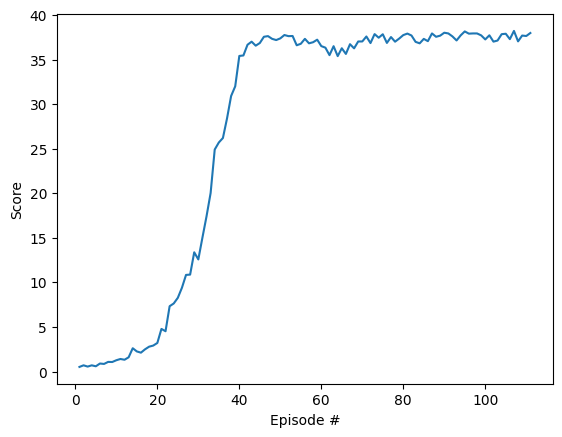

In [4]:
import random
import torch
import numpy as np
from ddpg_agent import Agent
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline


#when solved ? 
solved_threshold = 30 

# Create the DDPG Agent (ddpg_agent.py)
agent = Agent(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)

print(f'\r Starting training')

def train_ddpg(n_episodes=700, max_t=1000, print_every=100) :
    
    # track the average score (across all agents) for each episode
    avg_episodic_scores_history = []
    scores_window = deque(maxlen=100)
    
    # Iterate till max_episodes
    for i_episode in range(1, n_episodes+1):
        
        #Reset the Unity Environment
        env_info = env.reset(train_mode=True)[brain_name]
        
        #Get the state information 
        states = env_info.vector_observations
        
        #reset agent
        agent.reset()
        
        #initialize current episode's all agent scores
        current_episode_agent_scores = np.zeros(num_agents)
        
        #Training loop for each epsisode
        for t in range(max_t):
            #determine the actions for each of the agents based on current states
            actions = agent.act(states)
            
            # actuate the actions on the environment to get next states, rewards to help build the experience info
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            local_done = env_info.local_done
            
            # Now send the experience info to the state to save in replay buffer and sample from buffer to lear
            agent.step(states, actions, rewards, next_states, local_done)
            
            #Update state and current_episode scores
            states = next_states
            current_episode_agent_scores += rewards
            
            # If any agent is done, then the episode is done
            if np.any(local_done):
                break 

        #update the episode's scores, calculate the mean over last 100 epsiode
        mean_score = np.mean(current_episode_agent_scores)
        avg_episodic_scores_history.append(mean_score)
        scores_window.append(mean_score)
        
        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}', end="")
        if i_episode % 1 == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.2f}')
        if np.mean(scores_window) >= solved_threshold:
            print(f'\nEnvironment solved in {i_episode-100} episodes!\tAverage Score: {np.mean(scores_window):.2f}')
            torch.save(agent.actor_local.state_dict(),  'Actor_Model_Checkpoint.pth')
            torch.save(agent.critic_local.state_dict(), 'Critic_Model_Checkpoint.pth')
            break
        
    return avg_episodic_scores_history


#Display the average score (across all agents for each episode)
scores = train_ddpg()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

#All Done, clean up
env.close()